__CUSTOMER PROPENSITY TO PURCHASE__

__The script performs the following steps:__
1. Data preprocessing and EDA.
2. Feature Engineering.
3. Model Training.
4. Model Evaluation.
5. Hyperparameters Optimization.
6. Interpretation.

__Data:__ "_Customer propensity to purchase_" (https://www.kaggle.com/datasets/benpowis/customer-propensity-to-purchase-data/data)

__Goal:__ to identify the most valuable prospects.

__Stakeholder:__ website owner, who would like to minimalize risk of abandoned cart.

__Problem:__ binary classification (purchase = 1, no purchase = 0).





__1. Preprocessing__

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [22]:
train = pd.read_csv('training_sample.csv')
train.head(2)

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [87]:
train.columns

Index(['UserID', 'basket_icon_click', 'basket_add_list', 'basket_add_detail',
       'sort_by', 'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'device_mobile', 'device_computer', 'device_tablet',
       'returning_user', 'loc_uk', 'ordered'],
      dtype='object')

__EDA__

In [9]:
train.shape

(151655, 25)

In [88]:
train.describe()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
count,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,...,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000
mean,0.099150,0.074521,0.112916,0.036849,0.026735,0.003570,0.016208,0.003511,0.230362,0.017277,...,0.000389,0.005542,0.001096,0.290024,0.680706,0.194220,0.128364,0.534915,0.933224,0.041926
std,0.298864,0.262617,0.316490,0.188391,0.161307,0.059647,0.126274,0.059151,0.421065,0.130302,...,0.019711,0.074241,0.033084,0.453773,0.466204,0.395599,0.334495,0.498780,0.249634,0.200420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151655 entries, 0 to 151654
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   151655 non-null  object
 1   basket_icon_click        151655 non-null  int64 
 2   basket_add_list          151655 non-null  int64 
 3   basket_add_detail        151655 non-null  int64 
 4   sort_by                  151655 non-null  int64 
 5   image_picker             151655 non-null  int64 
 6   account_page_click       151655 non-null  int64 
 7   promo_banner_click       151655 non-null  int64 
 8   detail_wishlist_add      151655 non-null  int64 
 9   list_size_dropdown       151655 non-null  int64 
 10  closed_minibasket_click  151655 non-null  int64 
 11  checked_delivery_detail  151655 non-null  int64 
 12  checked_returns_detail   151655 non-null  int64 
 13  sign_in                  151655 non-null  int64 
 14  saw_checkout        

> All data types are integer, except - 'UserID' which is an object data type.

> There is no need to normalize the data - ('userID': 0-1).

In [ ]:
train.isnull().sum()

UserID                     0
basket_icon_click          0
basket_add_list            0
basket_add_detail          0
sort_by                    0
image_picker               0
account_page_click         0
promo_banner_click         0
detail_wishlist_add        0
list_size_dropdown         0
closed_minibasket_click    0
checked_delivery_detail    0
checked_returns_detail     0
sign_in                    0
saw_checkout               0
saw_sizecharts             0
saw_delivery               0
saw_account_upgrade        0
saw_homepage               0
device_mobile              0
device_computer            0
device_tablet              0
returning_user             0
loc_uk                     0
ordered                    0
dtype: int64

> No missing values.

__Visualization__

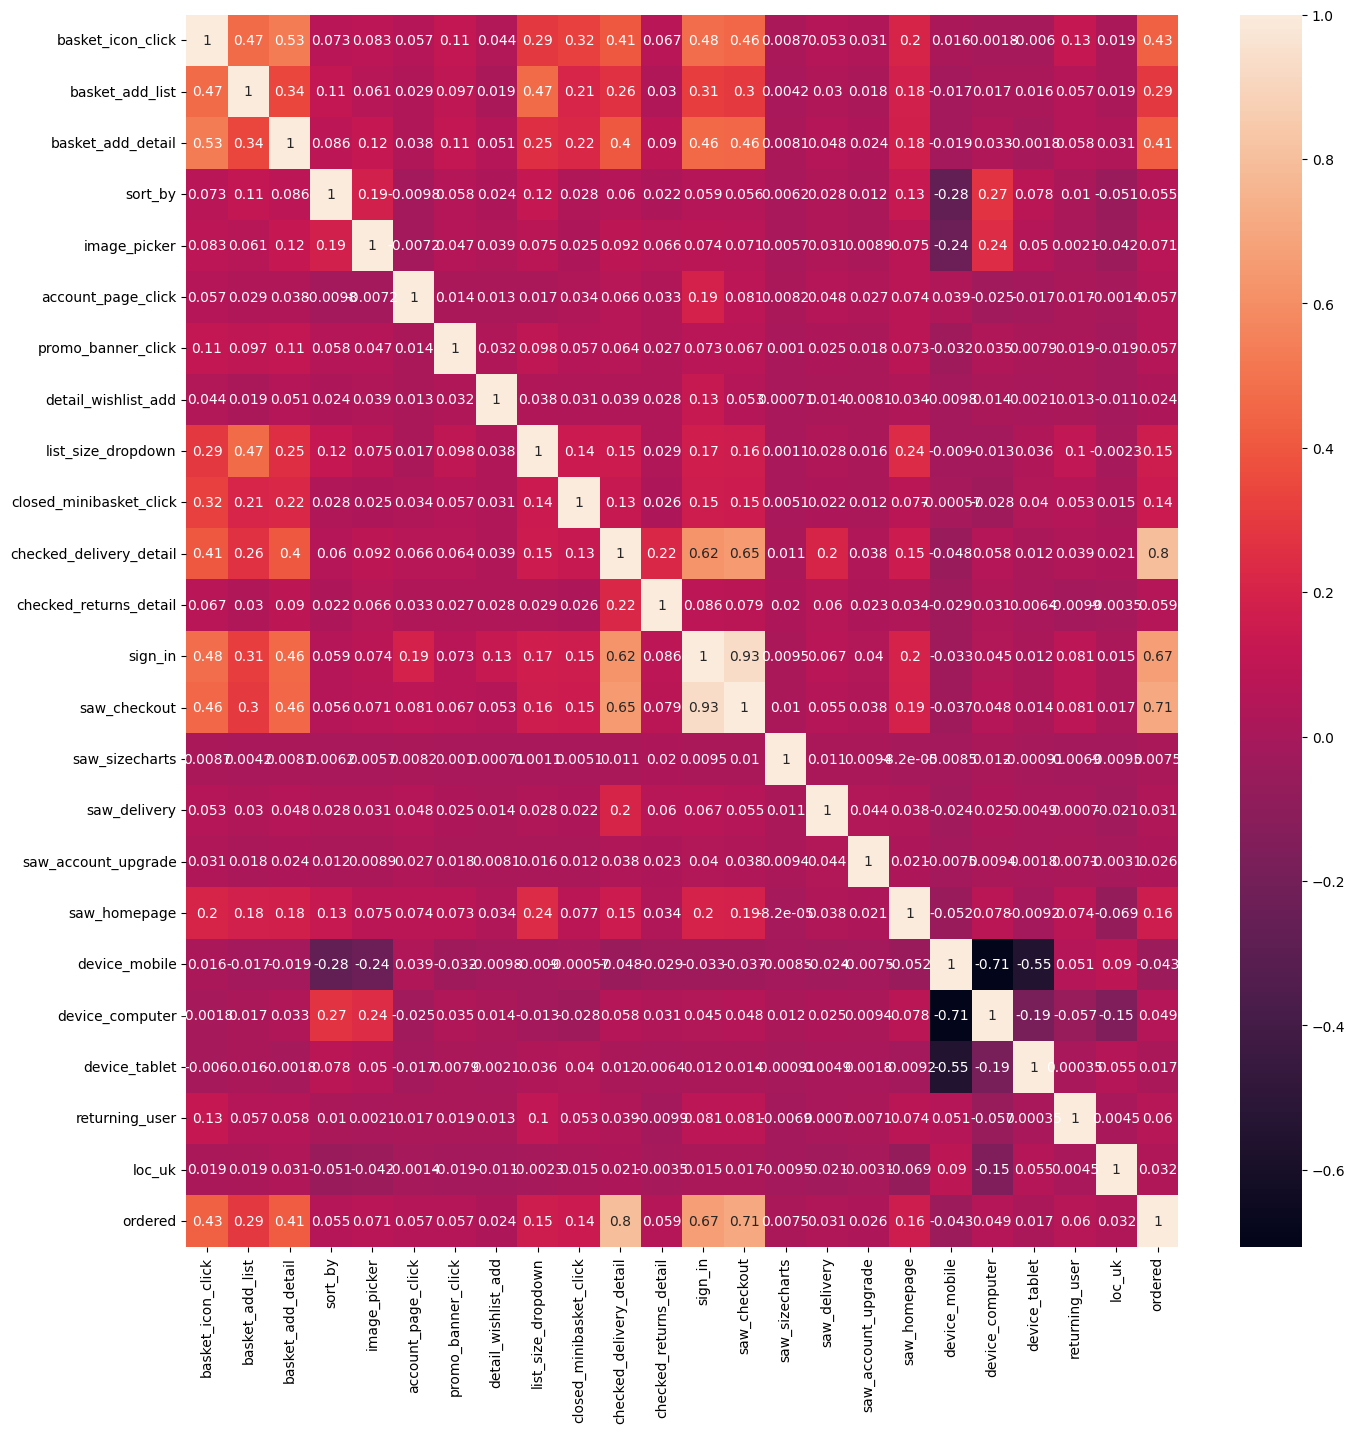

In [ ]:
train_corr = train.select_dtypes(include=["number"])
corr = train_corr.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, annot=True)
plt.show()

> There is a high correlation between visitors who ordered and visitors who saw checkout,signed in and checked delivery details - that's reasonable. The columns: device_mobile, device_computer and device_tablet seem to have low impact on results.

In [ ]:
train_corr.corr()['ordered'].sort_values(ascending=False)

ordered                    1.000000
checked_delivery_detail    0.798720
saw_checkout               0.708986
sign_in                    0.665556
basket_icon_click          0.428334
basket_add_detail          0.414420
basket_add_list            0.287666
saw_homepage               0.157778
list_size_dropdown         0.154867
closed_minibasket_click    0.140011
image_picker               0.071492
returning_user             0.060295
checked_returns_detail     0.059484
account_page_click         0.057279
promo_banner_click         0.056533
sort_by                    0.054636
device_computer            0.049208
loc_uk                     0.031643
saw_delivery               0.031461
saw_account_upgrade        0.025857
detail_wishlist_add        0.023516
device_tablet              0.016939
saw_sizecharts             0.007548
device_mobile             -0.042907
Name: ordered, dtype: float64

__Feature Importance Analysis__

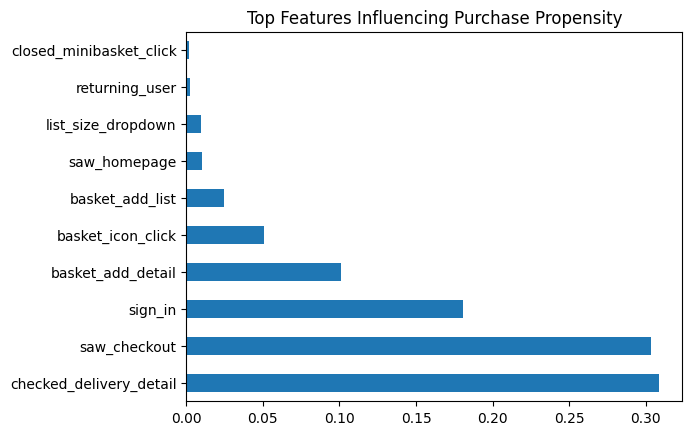

In [102]:
feature_importance = pd.Series(random_forest.feature_importances_, index=X.columns)
plt.title("Top Features Influencing Purchase Propensity")
feature_importance.nlargest(10).plot(kind='barh')
plt.show()

> The most correlated features have also the most input on the results.

__2. Feature Engineering__

Let's remove column device_mobile.

We're also going to drop 'ordered' from our predictors as it is our target variable.


In [103]:
train.columns

Index(['UserID', 'basket_icon_click', 'basket_add_list', 'basket_add_detail',
       'sort_by', 'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'device_mobile', 'device_computer', 'device_tablet',
       'returning_user', 'loc_uk', 'ordered'],
      dtype='object')

In [ ]:
# Separate the target variable from the features. 
X = train.drop(['ordered', 'UserID', 'device_mobile'], axis=1)
y = train['ordered']

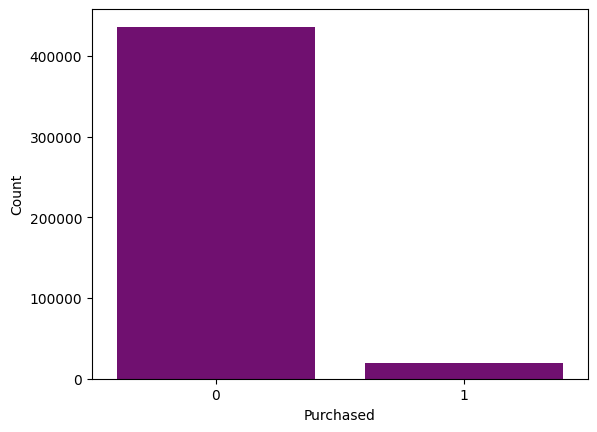

In [80]:
# How many users purchased
count = sns.countplot(x='ordered', data=train, color='purple')
count.set(xlabel='Purchased', ylabel='Count')
figsize=(10,2)
plt.show()

> Target class is imbalanced. There are far more people not buying than buying.

In [ ]:
# Smote sythetic minority over-sampling technique
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(train.drop(['ordered', 'UserID', 'device_mobile'], axis=1), train['ordered'])
y_sm.value_counts()

X = X_sm
y = y_sm

Axes(0.125,0.11;0.775x0.77)


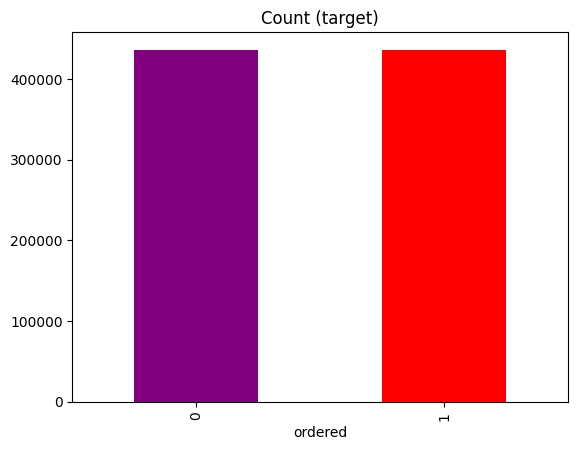

In [74]:
print(y.value_counts().plot(kind='bar', title='Count (target)', color=['purple', 'red']))


__3. Model Training__

Split the data into training and testing sets.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((364320, 22), (91081, 22), (364320,), (91081,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score

Let's start with a simple model __Logistic Regression__.

In [11]:
linear_regression = LogisticRegression()
linear_regression.fit(X_train, y_train)
y_pred_lr = linear_regression.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)

print("Accuracy Logistic Regression: ", accuracy_score(y_test, y_pred_lr))
print("Precision Logistic Regression: ", precision_score(y_test, y_pred_lr))
print("Recall Logistic Regression: ", recall_score(y_test, y_pred_lr))

Accuracy Logistic Regression:  0.9930610960247692
Precision Logistic Regression:  0.8647268224733013
Recall Logistic Regression:  0.9869281045751634


In [ ]:
#binary cross entropy
from sklearn.metrics import log_loss
log_loss_lr = log_loss(y_test, y_pred_lr)
print("Log loss Logistic Regression: ", log_loss(y_test, y_pred_lr))

Log loss Logistic Regression:  0.2501034497835844


> 0.25 loss is quite good.

Let's try with a more complex model: __Random Forest__.

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
random_forest.fit(X_train, y_train)

y_pred_random_forest = random_forest.predict(X_test)
y_prob = random_forest.predict_proba(X_test)[:,1] # probability for ROC AUC

__4. Evaluation__

Let's evaluate initial performance with Confusion Matrix

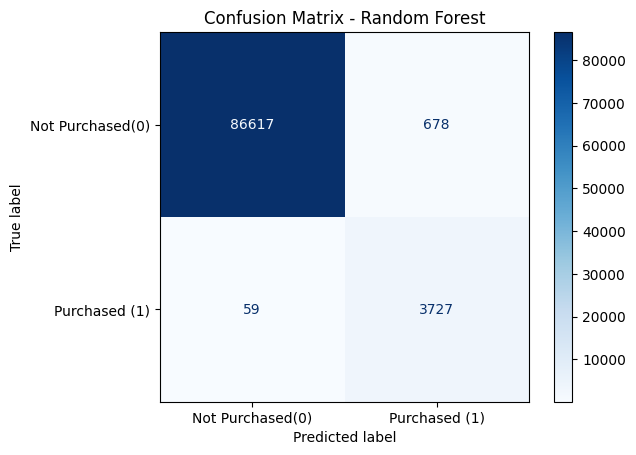

In [106]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_random_forest)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Purchased(0)", "Purchased (1)"])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Random Forest')
plt.show()

> High True Negatives

TN - 86617 (correct rejections)

FP - 678 (false alarms)

FN - 59 (missed purchases)

TP - 3727 (correct purchases)

Let's have a look at metrics.

In [90]:
precision_rf = precision_score(y_test, y_pred_random_forest)
recall_rf = recall_score(y_test, y_pred_random_forest)
accuracy_rf = accuracy_score(y_test, y_pred_random_forest)
print("Precision Random Forest: ", precision_rf)
print("Accuracy Random Forest: ", accuracy_rf)
print("Recall Random Forest: ", recall_rf)

Precision Random Forest:  0.8460839954597049
Accuracy Random Forest:  0.9919083014020488
Recall Random Forest:  0.9844162704701532


> High precision, low false positives

> Recall 98%, which is great, model catches most buyers

> Accuracy is very high

In [107]:
print(classification_report(y_test, y_pred_random_forest))
print("ROC AUC Random Forest: ", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     87295
           1       0.85      0.98      0.91      3786

    accuracy                           0.99     91081
   macro avg       0.92      0.99      0.95     91081
weighted avg       0.99      0.99      0.99     91081

ROC AUC Random Forest:  0.9959989590887255


>> Model is already very good, but we can see if optimization would change anything in metrics.

__Hyperparameter optimization__

In [104]:
from sklearn.model_selection import RandomizedSearchCV

param = {
    'n_estimators': [5,100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', 0.5],
    'bootstrap': [True, False]
    }

model_rs = RandomizedSearchCV(estimator=random_forest, param_distributions=param)
model_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', 0.5],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [5, 100, 200]})

Let'a evaluate improvements.

In [105]:
y_pred_rf_cv = model_rs.predict(X_test)
accuracy_rf_cv = accuracy_score(y_test, model_rs.predict(X_test))
precision_rf_cv = precision_score(y_test, y_pred_rf_cv)
recall_rf_cv = recall_score(y_test, y_pred_rf_cv)
print('Accuracy Random Forest CV:', accuracy_rf_cv)
print('Accuracy Random Forest:', accuracy_rf)
print('Precision Random Forest CV:', precision_rf_cv)
print('Precision Random Forest:', precision_rf)
print('Recall Random Forest CV:', recall_rf_cv)
print('Recall Random Forest:', recall_rf)


Accuracy Random Forest CV: 0.9916338204455375
Accuracy Random Forest: 0.9919083014020488
Precision Random Forest CV: 0.8381037567084079
Precision Random Forest: 0.8460839954597049
Recall Random Forest CV: 0.9899630216587427
Recall Random Forest: 0.9844162704701532


> Very low improvements after optimization 

__6. Interpretation.__

In this analysis of the Customer Propensity to Purchase, I evaluated two machine learninf models: Logistic Regression and Random Forest, to predict customer likelihood to make a purchase.

Based on the model performance metrics, Random Forest outperformed Logistic Regression. It achieved accuracy - 0.99, precision - 0.85, and recall - 0.98. These results indicate that the model correctly identifies a high proportion of potential buyers while maintaining a strong balance between precision and recall. The high recall score suggest that the model effectively captures most buyers.


